<a href="https://colab.research.google.com/github/syarifhilmi/tugas_akhir_dsu/blob/main/tugas_akhir_dsu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tugas Akhir DSU** <br>
Skenario = Membuat model image classification pada kucing dan anjing dengan akurasi minimal 95% <br>
Manfaat = Model dapat digunakan untuk mengklasifikasi kucing dan anjing pada aplikasi end-user. <br>
Dataset = https://www.kaggle.com/chetankv/dogs-cats-images

# **Persiapan Dataset**<br>


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Data Science and Machine Learning/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Data Science and Machine Learning/Kaggle

/content/gdrive/My Drive/Data Science and Machine Learning/Kaggle


In [ ]:
!kaggle datasets download -d chetankv/dogs-cats-images

 99% 431M/435M [00:04<00:00, 119MB/s]
100% 435M/435M [00:04<00:00, 110MB/s]


In [ ]:
ls

 dogs-cats-images.zip                    imdb_indonesian_movies_2.csv
'IMDB Dataset.csv'                       imdb-synopsis-indonesian-movies.zip
 imdb-dataset-of-50k-movie-reviews.zip   kaggle.json


In [ ]:
!unzip \dogs-cats-images.zip 

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: dog vs cat/dataset/training_set/cats/cat.37.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.370.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3700.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3701.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3702.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3703.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3704.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3705.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3706.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3707.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3708.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3709.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.371.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3710.jpg  
  inflating: dog vs cat/dataset/tra

In [ ]:
!ls

 dataset	        imdb-dataset-of-50k-movie-reviews.zip
 dogs-cats-images.zip   imdb_indonesian_movies_2.csv
'dog vs cat'	        imdb-synopsis-indonesian-movies.zip
'IMDB Dataset.csv'      kaggle.json


In [ ]:
cd /content/gdrive/My Drive/Data Science and Machine Learning/Kaggle/dataset

/content/gdrive/My Drive/Data Science and Machine Learning/Kaggle/dataset


In [ ]:
ls

test_set/  training_set/


In [ ]:
cd test_set

/content/gdrive/My Drive/Data Science and Machine Learning/Kaggle/dataset/test_set


In [ ]:
 ls

cats/  dogs/


In [ ]:
 ls -l cats |grep .jpg |wc -l

1000


In [ ]:
ls -l dogs |grep .jpg |wc -l

1000


Total test set 2000 gambar, 1000 gambar anjing dan 1000 gambar kucing

In [ ]:
cd ..

/content/gdrive/My Drive/Data Science and Machine Learning/Kaggle/dataset


In [ ]:
cd training_set

/content/gdrive/My Drive/Data Science and Machine Learning/Kaggle/dataset/training_set


In [ ]:
ls

cats/  dogs/


In [ ]:
ls -l cats |grep .jpg |wc -l

4000


In [ ]:
ls -l dogs |grep .jpg |wc -l

4000


Total training sets ada 8000 gambar, 4000 gambar kucing dan 4000 gambar anjing

In [ ]:
cd ..

/content/gdrive/My Drive/Data Science and Machine Learning/Kaggle/dataset


# **Pengolahan**

Dari sumber datasetnya sudah terbagi untuk training dataset dan test dataset

In [ ]:
train_dir = os.path.join('training_set')
test_dir = os.path.join('test_set')

In [ ]:
os.listdir('training_set')

['cats', 'dogs']

In [ ]:
os.listdir('test_set')

['cats', 'dogs']

Membuat augmentasi gambar

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

Mempersiapkan data train dan test

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Menggunakan transfer learning model dari library Keras. Mengapa yang digunakan InceptionResNetV2, karena pada tabel di library Keras, model ini memiliki akurasi yang paling tinggi.

In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import Input
base_model = InceptionResNetV2(include_top=False, input_tensor=Input(shape=(150,150,3)))
base_model.trainable = False
base_model.summary()

219062272/219055592 [==============================] - 2s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_____________

Mempersiapkan model final

In [ ]:
model = tf.keras.models.Sequential([
  base_model,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(2, activation= 'softmax'),
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Menambahkan callback earlystopping untuk mengantisipasi pengulangan yang tidak diperlukan. Dan menambahkan akurasi callback agar pengulangan berhenti ketika sudah tercapai akurasi yang diiginkan.

In [ ]:
class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('val_accuracy') > 0.95 and logs.get('accuracy') > 0.95):
        print("\nSudah Cukup")
        self.model.stop_training = True
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)
callback = AccuracyCallback()
history = model.fit(
      train_generator, # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=100, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,
      callbacks = [callback,es_callback],
      steps_per_epoch=5, # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/100
5/5 - 51s - loss: 4.2398 - accuracy: 0.7812 - val_loss: 2.6915 - val_accuracy: 0.9250
Epoch 2/100
5/5 - 32s - loss: 1.0681 - accuracy: 0.9563 - val_loss: 1.1859 - val_accuracy: 0.9563

Sudah Cukup


2 Grafik di bawah dapat digunakan untuk analisa, apakah model ini sudah baik, overfitting, atau underfitting

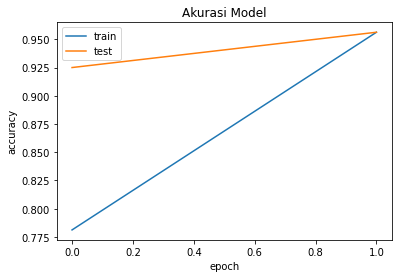

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

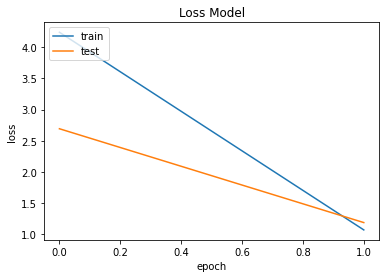

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **KESIMPULAN**
Model berhasil dibuat dengan akurasi 95% pada epoch kedua dari 100 epoch yang direncanakan. Grafik akurasi dan loss model juga menunjukkan hasil yang baik, tidak terdapat overfitting maupun underfitting.